In [49]:
import tensorflow as tf
import tensorflow_hub as tfhub

import matplotlib.pyplot as plt

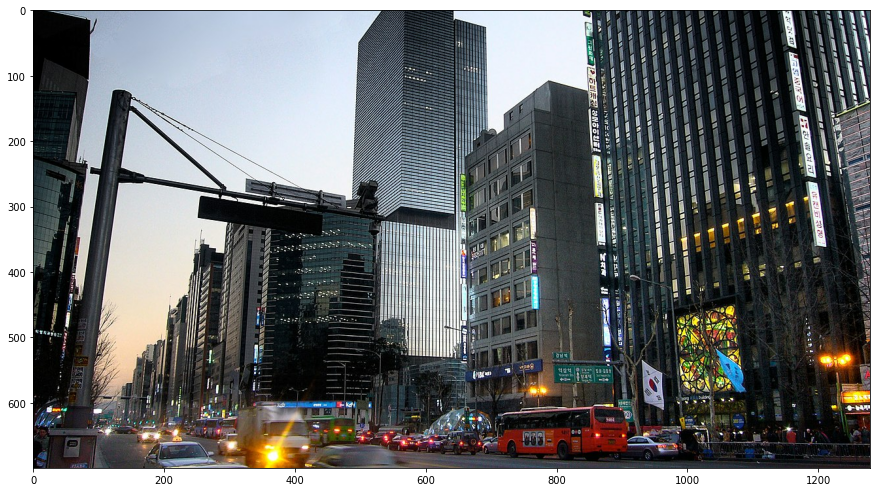

In [50]:
image_path = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Gangnam_Seoul_January_2009.jpg/1280px-Gangnam_Seoul_January_2009.jpg'
image = tf.keras.utils.get_file(fname='gangnam', origin=image_path)
image = tf.io.read_file(image) # 파일 객체를 string로 변환
image = tf.image.decode_jpeg(image, channels=3) # 문자(string)를 숫자(uint8) 텐서로 변환
image = tf.image.convert_image_dtype(image, tf.float32) # 0~1 범위로 정규화

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(image)

plt.show()

In [51]:
# 사전 학습 모델은 배치크기를 포함하여 4차원 텐서를 입력으로 받으므로 맨앞에 새로운 차원을 추가
image_input = image[tf.newaxis, ...]
image_input.shape

TensorShape([1, 700, 1280, 3])

In [52]:
model = tfhub.load('https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [53]:
# 모델 시그니쳐(용도) 확인
model.signatures.keys()

KeysView(_SignatureMap({'default': <ConcreteFunction pruned(images) at 0x7FA9695E7DD0>}))

In [54]:
# 객체탐지 모델 생성
obj_detector = model.signatures['default']
obj_detector

<ConcreteFunction pruned(images) at 0x7FA9695E7DD0>

In [55]:
# 예측
result = obj_detector(image_input)
result.keys()

# detection_boxes: 경계 박스(bounding box) 좌표 [ymin, xmin, ymax, xmax]
# detection_class_entities: 검출된 클래스 아이디
# detection_scores: 검출 스코어

dict_keys(['detection_class_entities', 'detection_class_names', 'detection_scores', 'detection_class_labels', 'detection_boxes'])

In [62]:
# 탐지한 객체의 개수
len(result['detection_scores'])

100

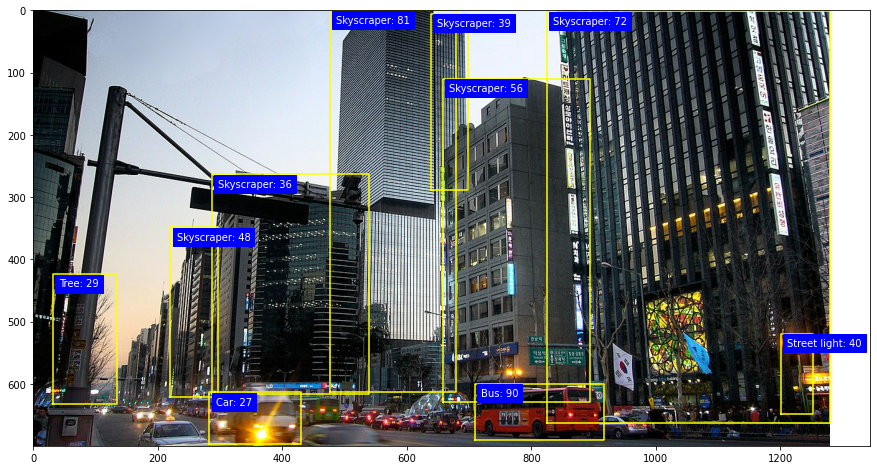

In [127]:
# 검출 score가 0.2보다 큰 경우만 경계 박스와 예측 클래스를 시각화(최대 10개)

boxes = result['detection_boxes'] # Bounding Box 좌표 예측 값
labels = result['detection_class_entities'] # 분류 예측값
scores = result['detection_scores'] # 신뢰도(confidence)

# 샘플 이미지 가로 세로 크기
img_height, img_width = image.shape[0], image.shape[1]

# 탐지할 최대 객체의 수
obj_to_detect = 10

# 시각화
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(obj_to_detect):
    #if scores[i] >= 0.2:
        (ymax, xmin, ymin, xmax) = (boxes[i][0]*img_height, boxes[i][1]*img_width, boxes[i][2]*img_height, boxes[i][3]*img_width)
        ax.imshow(image)
        ax.plot([xmin, xmax, xmax, xmin, xmin], [ymin, ymin, ymax, ymax, ymin], color='yellow')

        class_name = labels[i].numpy().decode('utf-8')
        infer_score = int(scores[i].numpy()*100)
        annotation = f"{class_name}: {infer_score}"
        ax.text(xmin+10, ymax+20, annotation, color='white', backgroundcolor='blue', fontsize=10)
    